In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Aim is to predict the marks of students of the test data

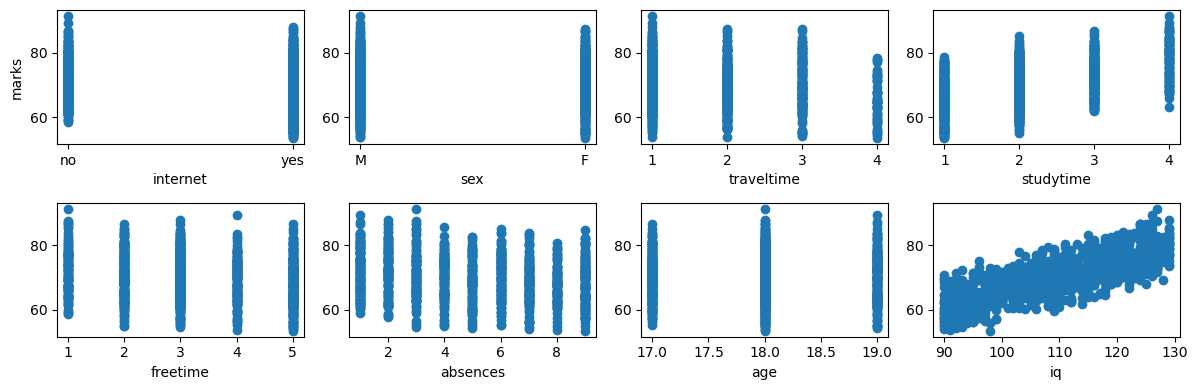

In [2]:
# Use the file namd 'training data' to train the model

data = pd.read_excel('Training data.xlsx').drop_duplicates()
x_train = np.array(data.iloc[:,0:8])
y_train = np.array(data.iloc[:,8]).reshape(-1,1)

# Try plotting y_train with different features
# To get an idea whether to add some features or not
# Add some features if required in x_train
x_col = data.columns[0:8]
plt.figure(figsize=(12,4))
plt.subplot(2,4,1)
plt.ylabel('marks')
for i in range(8):
    if i<5:
        plt.subplot(2,4,i+1)
        plt.scatter(x_train[:,i],y_train)
        plt.xlabel(x_col[i])
    else:
        plt.subplot(2,4,i+1)
        plt.scatter(x_train[:,i],y_train)
        plt.xlabel(x_col[i])
plt.tight_layout()

# Also do label encoding for features not represented in numbers
# refer the link if not know : https://youtu.be/589nCGeWG1w?si=t2Wa7LgbUOO4RooM

def feature_changing(x_train):
  # ---------
 
      # Define a dictionary for the replacements
  replacements = {'yes': 1, 'no': 0,'M':1,'F':0}
  column_index = [0,1]
    # Replace the values in the specified column
  for i in column_index:
    for old_value, new_value in replacements.items():
      x_train[:,i] = np.where(x_train[:,i] == old_value, new_value, x_train[:,i])
  col = list(range(8))
  x_train = x_train[:,col]
 
  # ---------
  return x_train

x_train = feature_changing(x_train)

In [3]:
def z_score(x_train):

  # ---------
  x_std=[np.std(x_train[:,i]) for i in range (x_train.shape[1] )]
  x_mean=[np.mean(x_train[:,i]) for i in range(x_train.shape[1] )]
  x_train = (x_train - x_mean)/x_std
  # ---------

  return x_train,x_std,x_mean

In [4]:
def cost(x_train,y_train,w,b):

  # ---------
  e = ((np.dot(x_train,w) + b) - y_train)**2
  cost = (1/2*x_train.shape[0])*(np.sum(e))
  # ---------

  return cost

In [5]:
def gradient_descent(x_train,y_train,w,b):

  # ---------
  lr = 0.005
  f_wb = np.dot(x_train,w) + b
  z = f_wb - y_train
  dj_dw = (np.dot(x_train.T,z))*(1/x_train.shape[0])
  dj_db = np.sum(z)*(1/x_train.shape[0])

  w = w - lr*dj_dw
  b = b - lr*dj_db

  # ---------

  return w,b

In [6]:
x_train = x_train.astype(np.float64)
x_train,x_std,x_mean = z_score(x_train)

np.random.seed(2147483647)
w = np.random.randn(x_train.shape[1],1)
b = np.random.randn(1)

old_cost = 0

while abs(old_cost - cost(x_train,y_train,w,b))>0.00001:
  old_cost = cost(x_train,y_train,w,b)
  w,b = gradient_descent(x_train,y_train,w,b)

x_predict = pd.read_excel('Test data.xlsx').iloc[:,:8].to_numpy()
x_predict = feature_changing(x_predict)
x_predict = (x_predict - x_mean)/x_std
ans = pd.read_excel('Test data.xlsx').iloc[:,8].to_numpy()

y_predict = np.dot(x_predict,w) + b
accuracy = 0
for dim in range(len(ans)):
  if abs(y_predict[dim]-ans[dim])<0.5: # do not change the tolerance as you'll be checked on +- 0.5 error only
    accuracy += 1
accuracy = round(accuracy*100/200.0,2)
ok = 'Congratulations' if accuracy>95 else 'Optimization required'
print(f"{ok}, your accuracy is {accuracy}%")

Congratulations, your accuracy is 100.0%
